In [1]:
import scanpy as sc
import squidpy as sq
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter
from matplotlib_scalebar.scalebar import ScaleBar
import os

import cell2location
import scvi

DPI = 300
FONTSIZE = 20  # 42
sc.settings.set_figure_params(
    scanpy=True, dpi=100, transparent=True, vector_friendly=True, dpi_save=DPI
)
from matplotlib import rcParams

rcParams["pdf.fonttype"] = 42

from matplotlib import rcParams
import seaborn as sns
from pathlib import Path

# QC utils functions - a package
from vistools import utils
from vistools import spatial_plots

Global seed set to 0


In [2]:
SAMPLE_NAME = "CRC11_LM_VISIUM"

In [3]:
# visium data path
SP_DATA_DIR = Path(
    f"/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/spaceranger13/{SAMPLE_NAME}/outs"
)

In [4]:
# store results
DIR2SAVE = Path(
    f"/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/qc/{SAMPLE_NAME}"
)  # to change
DIR2SAVE.mkdir(parents=True, exist_ok=True)

In [5]:
# figures
FIG2SAVE = DIR2SAVE.joinpath("figures/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)
# set the global variable: sc.settings.figdir to save all plots
sc.settings.figdir = FIG2SAVE

---
### 1. Load Visium data 

In [6]:
adata_vis = utils.read_and_qc(SP_DATA_DIR)

/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Sample  CRC11_LM_VISIUM


/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/scanpy/preprocessing/_qc.py:422: RuntimeWarning: invalid value encountered in true_divide
  return values / sums[:, None]


In [7]:
# check no gene name duplicates since we used unique
# get gene names Couter style
# Counter(np.array(adata_sc.var_names))
Counter(np.array(adata_vis.var.index))
print([k for k, v in Counter(np.array(adata_vis.var.index)).items() if v > 1])

[]


In [9]:
adata_vis.obs.Sample + "_" + adata_vis.obs_names

spot_id
CRC11_LM_VISIUM_AAACAAGTATCTCCCA-1    CRC11_LM_VISIUM_CRC11_LM_VISIUM_AAACAAGTATCTCC...
CRC11_LM_VISIUM_AAACCCGAACGAAATC-1    CRC11_LM_VISIUM_CRC11_LM_VISIUM_AAACCCGAACGAAA...
CRC11_LM_VISIUM_AAACCGGGTAGGTACC-1    CRC11_LM_VISIUM_CRC11_LM_VISIUM_AAACCGGGTAGGTA...
CRC11_LM_VISIUM_AAACCGTTCGTCCAGG-1    CRC11_LM_VISIUM_CRC11_LM_VISIUM_AAACCGTTCGTCCA...
CRC11_LM_VISIUM_AAACCTCATGAAGTTG-1    CRC11_LM_VISIUM_CRC11_LM_VISIUM_AAACCTCATGAAGT...
                                                            ...                        
CRC11_LM_VISIUM_TTGTTAGCAAATTCGA-1    CRC11_LM_VISIUM_CRC11_LM_VISIUM_TTGTTAGCAAATTC...
CRC11_LM_VISIUM_TTGTTCAGTGTGCTAC-1    CRC11_LM_VISIUM_CRC11_LM_VISIUM_TTGTTCAGTGTGCT...
CRC11_LM_VISIUM_TTGTTGTGTGTCAAGA-1    CRC11_LM_VISIUM_CRC11_LM_VISIUM_TTGTTGTGTGTCAA...
CRC11_LM_VISIUM_TTGTTTCACATCCAGG-1    CRC11_LM_VISIUM_CRC11_LM_VISIUM_TTGTTTCACATCCA...
CRC11_LM_VISIUM_TTGTTTCCATACAACT-1    CRC11_LM_VISIUM_CRC11_LM_VISIUM_TTGTTTCCATACAA...
Length: 1778, dtype: obj

In [9]:
adata_vis.obs.describe()

in_tissue    array_row    array_col  n_genes_by_counts  total_counts  \
count     1778.0  1778.000000  1778.000000        1778.000000   1778.000000   
mean         1.0    40.430821    66.555681        3732.541620  18320.851562   
std          0.0    11.117472    27.213603        2121.868393  18046.349609   
min          1.0     9.000000    11.000000           0.000000      0.000000   
25%          1.0    32.000000    45.000000        1966.500000   4979.500000   
50%          1.0    40.000000    67.000000        3404.500000  11188.000000   
75%          1.0    49.000000    89.000000        5479.500000  26720.750000   
max          1.0    63.000000   117.000000        9359.000000  99644.000000   

       pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
count                 1776.000000                  1776.000000   
mean                    29.271224                    41.299609   
std                      7.249817                     7.534533   
min                     18.823409                    28.358209   
25%                     25.874217                    37.418157   
50%                     28.319195                    40.383406   
75%                     30.907928                    43.433671   
max                    100.000000                   100.000000   

       pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
count                  1776.000000                  1776.000000   
mean                     52.241283                    66.418496   
std                       7.558570                     8.289370   
min                      38.373995                    51.281178   
25%                      48.051498                    61.516872   
50%                      51.423244                    64.896753   
75%                      54.519985                    68.804507   
max                     100.000000                   100.000000   

       total_counts_mt  pct_counts_mt  total_counts_ribo  pct_counts_ribo  
count      1778.000000    1776.000000        1778.000000      1776.000000  
mean        308.571442       2.351995        5608.706543        28.608662  
std         306.338318       1.744517        6258.156738         5.603613  
min           0.000000       0.000000           0.000000         0.000000  
25%         110.000000       1.210222        1290.500000        25.106092  
50%         204.500000       1.881379        2993.000000        28.609930  
75%         389.750000       3.014904        7788.250000        31.989340  
max        2485.000000      20.000000       37404.000000        75.000000

In [10]:
adata_vis.var.describe()

n_cells_by_counts   mean_counts  pct_dropout_by_counts   total_counts
count       36601.000000  36601.000000           36601.000000   36601.000000
mean          181.319062      0.500556              89.802077     889.988708
std           331.396823      4.386052              18.638741    7798.399414
min             0.000000      0.000000               0.506187       0.000000
25%             0.000000      0.000000              87.232846       0.000000
50%             4.000000      0.002250              99.775028       4.000000
75%           227.000000      0.165917             100.000000     295.000000
max          1769.000000    214.947693             100.000000  382177.000000

In [11]:
# remove MT genes for spatial mapping (keeping their counts in the object)
print("Number of mt genes:", adata_vis.var["mt"].sum())
adata_vis.obsm["mt"] = adata_vis[:, adata_vis.var["mt"].values].X.toarray()
adata_vis = adata_vis[:, ~adata_vis.var["mt"].values]
print("After mt genes removal ", adata_vis.shape)

Number of mt genes: 13
After mt genes removal  (1778, 36588)


In [12]:
# remove ribosomal genes as well as we remove them from the scRNA-seq data when we do the analysis
print("Number of ribo genes:", adata_vis.var["ribo"].sum())
adata_vis.obsm["ribo"] = adata_vis[:, adata_vis.var["ribo"].values].X.toarray()
adata_vis = adata_vis[:, ~adata_vis.var["ribo"].values].copy()
print("After ribo genes removal ", adata_vis.shape)

Number of ribo genes: 103
After ribo genes removal  (1778, 36485)


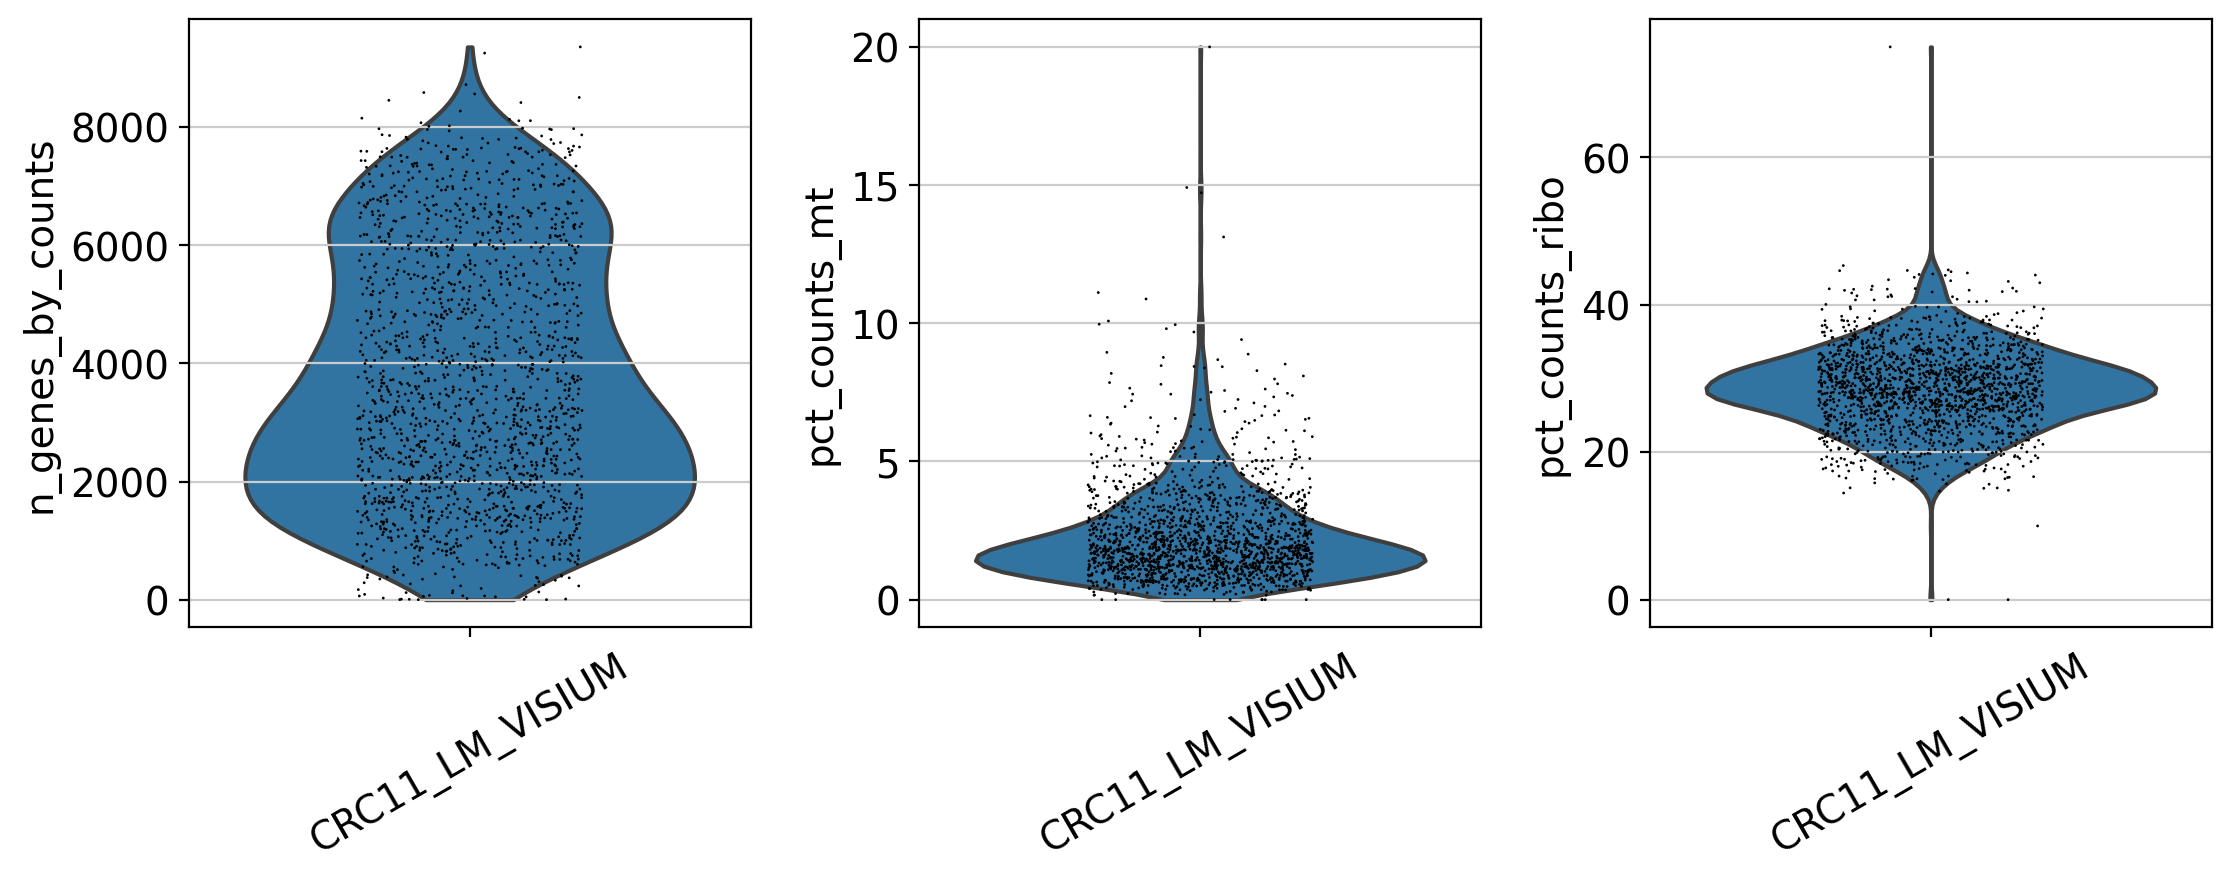

In [13]:
# violin plot of some distributions
sc.pl.violin(
    adata_vis,
    keys=["n_genes_by_counts", "pct_counts_mt", "pct_counts_ribo"],
    groupby="Sample",
    jitter=0.2,
    multi_panel=True,
    rotation=30,
    show=True,
    save="QC_covariates.pdf",
)

/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


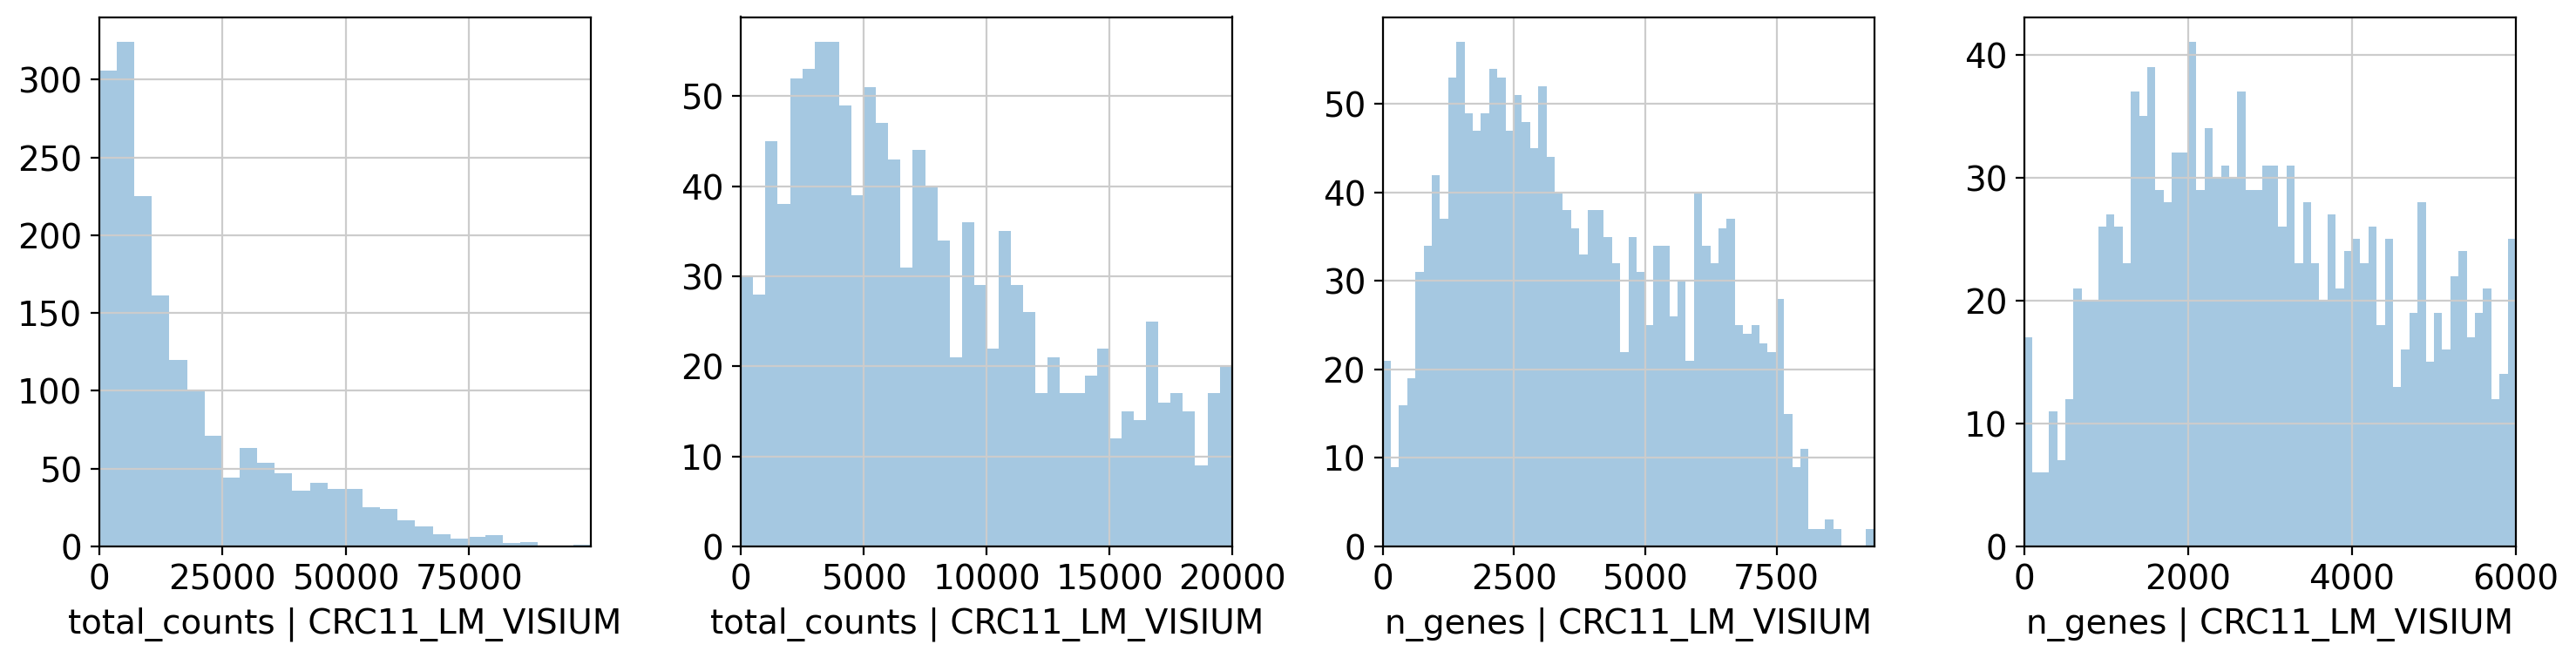

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
axs = axs.reshape((1, 4))

# fig.suptitle('Covariates for filtering')

sns.distplot(adata_vis.obs["total_counts"], kde=False, ax=axs[0, 0])
axs[0, 0].set_xlim(0, adata_vis.obs["total_counts"].max())
axs[0, 0].set_xlabel("total_counts | " + adata_vis.obs["Sample"].cat.categories[0])

sns.distplot(
    adata_vis.obs["total_counts"][adata_vis.obs["total_counts"] < 20000],
    kde=False,
    bins=40,
    ax=axs[0, 1],
)
axs[0, 1].set_xlim(0, 20000)
axs[0, 1].set_xlabel("total_counts | " + adata_vis.obs["Sample"].cat.categories[0])

sns.distplot(adata_vis.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[0, 2])
axs[0, 2].set_xlim(0, adata_vis.obs["n_genes_by_counts"].max())
axs[0, 2].set_xlabel("n_genes | " + adata_vis.obs["Sample"].cat.categories[0])

sns.distplot(
    adata_vis.obs["n_genes_by_counts"][adata_vis.obs["n_genes_by_counts"] < 6000],
    kde=False,
    bins=60,
    ax=axs[0, 3],
)
axs[0, 3].set_xlim(0, 6000)
axs[0, 3].set_xlabel("n_genes | " + adata_vis.obs["Sample"].cat.categories[0])

plt.tight_layout()
plt.savefig(
    FIG2SAVE.joinpath("hist_QC_covariates.pdf"),
    dpi=DPI,
    format="pdf",
    bbox_inches="tight",
)
plt.show()

In [15]:
# filtering visium data
sc.pp.filter_cells(adata_vis, min_genes=5)
sc.pp.filter_genes(adata_vis, min_cells=3)  # 10

In [16]:
adata_vis.shape

(1774, 19059)

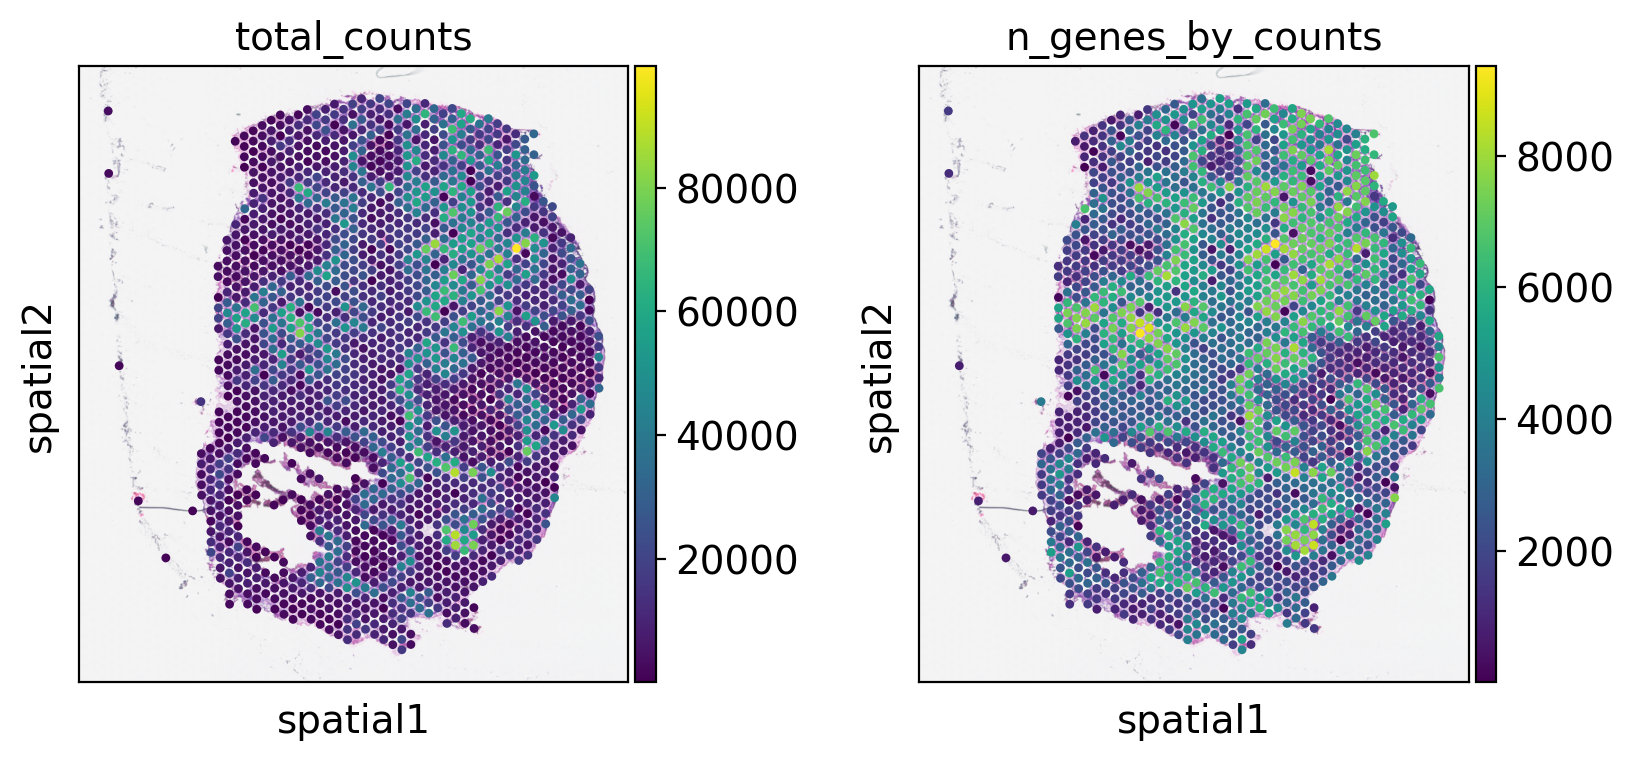

In [17]:
sc.pl.spatial(
    adata_vis,
    img_key="hires",
    cmap="viridis",
    color=["total_counts", "n_genes_by_counts"],
    gene_symbols="SYMBOL",
    size=1.3,
    save="QC_covariates.pdf",
)

### segmentation
---

In [18]:
# scale factor
adata_vis.uns["spatial"][f"{SAMPLE_NAME}"]["scalefactors"]["tissue_hires_scalef"]

0.08585165

In [19]:
my_image = sq.im.ImageContainer(
    img=adata_vis.uns["spatial"][f"{SAMPLE_NAME}"]["images"]["hires"],
    layer="image",
    scale=adata_vis.uns["spatial"][f"{SAMPLE_NAME}"]["scalefactors"][
        "tissue_hires_scalef"
    ],
)

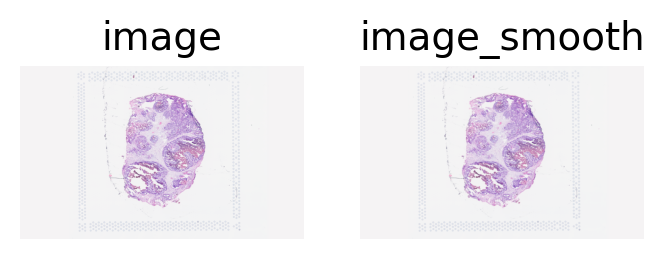

In [20]:
# Before segmenting the image, we smooth it using squidpy.im.process().
sq.im.process(img=my_image, layer="image", method="smooth")
# plot the result
fig, axes = plt.subplots(1, 2)
for layer, ax in zip(["image", "image_smooth"], axes):
    my_image.show(layer, ax=ax)
    ax.set_title(layer)

#### segment
We will use channel 0 to do the segmentation, as this channel contains most of the nuclei information within an H&E stain.

We use squidpy.im.segment() with method = 'watershed' to do the segmentation. Since, opposite to the fluorescence DAPI stain, in the H&E stain nuclei appear darker, we need to indicate to the model that it should treat lower-intensity values as foreground. We do this by specifying the geq = False in the kwargs.

In [21]:
sq.im.segment(
    img=my_image,
    layer="image_smooth",
    layer_added="segmented_watershed",
    method="watershed",
    channel=0,
    qeq=False,
)

In [22]:
my_image

ImageContainer[shape=(1220, 2000), layers=['image', 'image_smooth', 'segmented_watershed']]

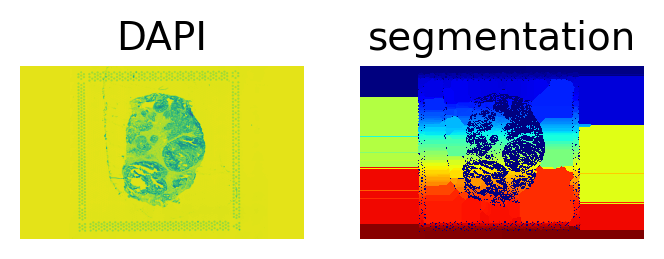

In [23]:
fig, axes = plt.subplots(1, 2)
my_image.show("image", channel=0, ax=axes[0])
_ = axes[0].set_title("DAPI")
my_image.show("segmented_watershed", cmap="jet", interpolation="none", ax=axes[1])
_ = axes[1].set_title("segmentation")

We then need to extract some image features from the tissue underneath each spot, useful for the deconvolution task downstream. Specifically, we will need:

   * the number of unique segmentation objects (i.e. nuclei) under each spot.

   *  the coordinates of the centroids of the segmentation object.

It will become clear later how we will be using them.

Now we can calculate segmentation features. Here, we will calculate the following features:

* number of nuclei `label`
* mean area of nuclei `area`

We use `mask_cicle = True` to ensure that we are only extracting features from the tissue underneath each Visium spot. 

In [24]:
sq.im.calculate_image_features(
    adata_vis,
    my_image,
    layer="image",  # "image",
    features="segmentation",
    key_added="segmentation_features",
    features_kwargs={
        "segmentation": {
            "label_layer": "segmented_watershed",
            "props": ["label", "area", "mean_intensity"],
            "channels": [1, 2],
        }
    },
    mask_circle=True,
)

  0%|          | 0/1774 [00:00<?, ?/s]

/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/data/BCI-CRC/nasrine/anaconda/envs/cell2loc19/lib/python3.9/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scala

In [25]:
adata_vis.obsm["segmentation_features"].head()

segmentation_label  \
CRC11_LM_VISIUM_AAACAAGTATCTCCCA-1                   0   
CRC11_LM_VISIUM_AAACCCGAACGAAATC-1                   1   
CRC11_LM_VISIUM_AAACCGGGTAGGTACC-1                   2   
CRC11_LM_VISIUM_AAACCGTTCGTCCAGG-1                   4   
CRC11_LM_VISIUM_AAACCTCATGAAGTTG-1                   3   

                                    segmentation_area_mean  \
CRC11_LM_VISIUM_AAACAAGTATCTCCCA-1                     NaN   
CRC11_LM_VISIUM_AAACCCGAACGAAATC-1                3.000000   
CRC11_LM_VISIUM_AAACCGGGTAGGTACC-1                7.000000   
CRC11_LM_VISIUM_AAACCGTTCGTCCAGG-1                4.750000   
CRC11_LM_VISIUM_AAACCTCATGAAGTTG-1                2.666667   

                                    segmentation_area_std  \
CRC11_LM_VISIUM_AAACAAGTATCTCCCA-1                    NaN   
CRC11_LM_VISIUM_AAACCCGAACGAAATC-1               0.000000   
CRC11_LM_VISIUM_AAACCGGGTAGGTACC-1               6.000000   
CRC11_LM_VISIUM_AAACCGTTCGTCCAGG-1               3.344772   
CRC11_LM_VISIUM_AAACCTCATGAAGTTG-1               1.247219   

                                    segmentation_ch-1_mean_intensity_mean  \
CRC11_LM_VISIUM_AAACAAGTATCTCCCA-1                                    NaN   
CRC11_LM_VISIUM_AAACCCGAACGAAATC-1                               0.530719   
CRC11_LM_VISIUM_AAACCGGGTAGGTACC-1                               0.899698   
CRC11_LM_VISIUM_AAACCGTTCGTCCAGG-1                               0.633450   
CRC11_LM_VISIUM_AAACCTCATGAAGTTG-1                               0.760022   

                                    segmentation_ch-1_mean_intensity_std  \
CRC11_LM_VISIUM_AAACAAGTATCTCCCA-1                                   NaN   
CRC11_LM_VISIUM_AAACCCGAACGAAATC-1                              0.000000   
CRC11_LM_VISIUM_AAACCGGGTAGGTACC-1                              0.006184   
CRC11_LM_VISIUM_AAACCGTTCGTCCAGG-1                              0.031020   
CRC11_LM_VISIUM_AAACCTCATGAAGTTG-1                              0.039599   

                                    segmentation_ch-2_mean_intensity_mean  \
CRC11_LM_VISIUM_AAACAAGTATCTCCCA-1                                    NaN   
CRC11_LM_VISIUM_AAACCCGAACGAAATC-1                               0.793464   
CRC11_LM_VISIUM_AAACCGGGTAGGTACC-1                               0.934691   
CRC11_LM_VISIUM_AAACCGTTCGTCCAGG-1                               0.834415   
CRC11_LM_VISIUM_AAACCTCATGAAGTTG-1                               0.892375   

                                    segmentation_ch-2_mean_intensity_std  
CRC11_LM_VISIUM_AAACAAGTATCTCCCA-1                                   NaN  
CRC11_LM_VISIUM_AAACCCGAACGAAATC-1                              0.000000  
CRC11_LM_VISIUM_AAACCGGGTAGGTACC-1                              0.002564  
CRC11_LM_VISIUM_AAACCGTTCGTCCAGG-1                              0.015935  
CRC11_LM_VISIUM_AAACCTCATGAAGTTG-1                              0.017121

In [26]:
adata_vis.obsm["segmentation_features"]["segmentation_label"].value_counts()

1    573
2    477
0    346
3    249
4     98
5     26
6      4
7      1
Name: segmentation_label, dtype: int64

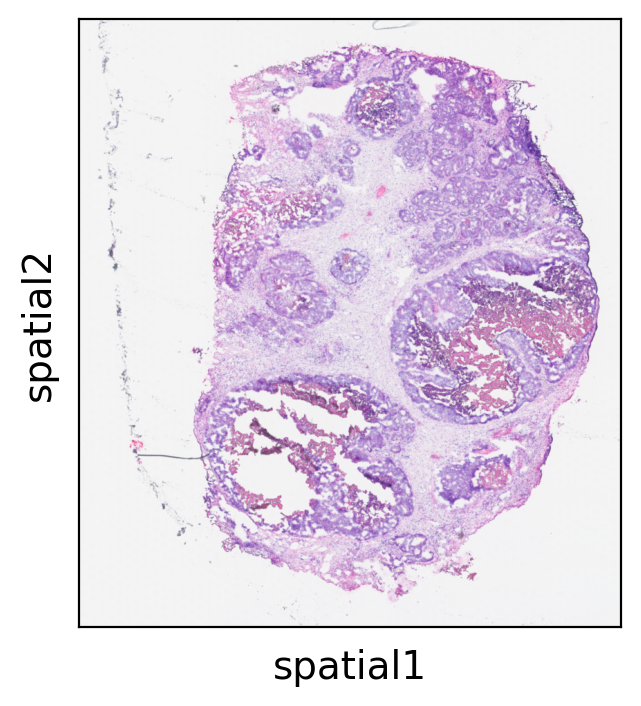

In [27]:
sc.pl.spatial(adata_vis, img_key="hires", save="HEstain.pdf", show=True)

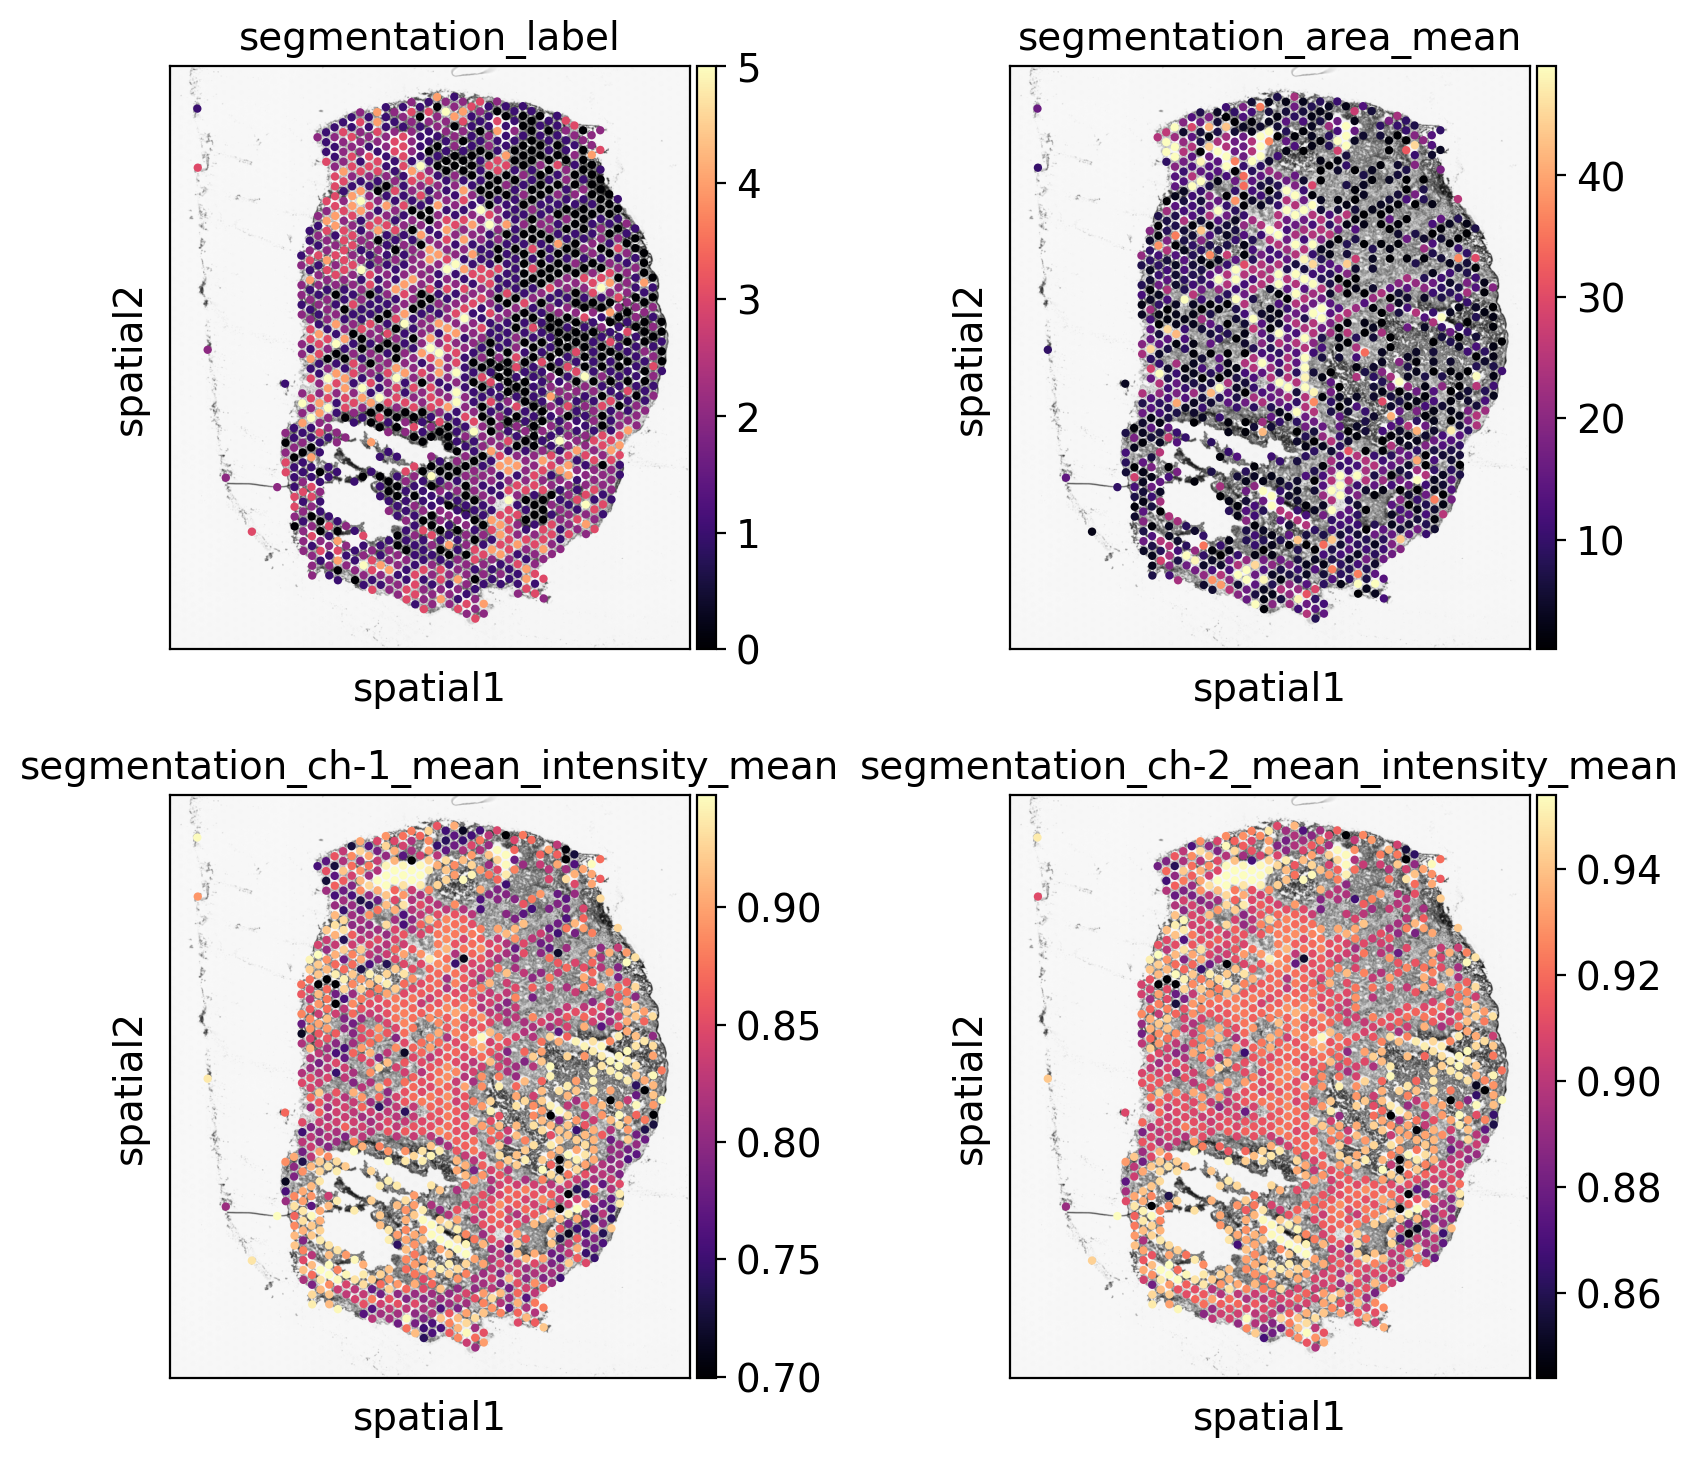

In [29]:
# plot segmentation features
sc.pl.spatial(
    sq.pl.extract(adata_vis, "segmentation_features"),
    color=[
        "segmentation_label",
        "segmentation_area_mean",
        "segmentation_ch-1_mean_intensity_mean",
        "segmentation_ch-2_mean_intensity_mean",
    ],
    bw=True,
    ncols=2,
    vmin="p1",
    vmax="p99",
    size=1.3,
    cmap="magma",
)

In [30]:
adata_vis.obsm["segmentation_features"]["segmentation_label"].mean()

1.5935738444193912

In [31]:
adata_vis.obsm["segmentation_features"]["segmentation_label"].describe()

count    1774.000000
mean        1.593574
std         1.217462
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: segmentation_label, dtype: float64

### save raw filtered counts

In [32]:
adata_vis.write(DIR2SAVE.joinpath(f"{SAMPLE_NAME}_raw.h5ad"))